# Financial Data and Preprocessing

## **Introduction**

The first chapter of this book is dedicated to a very important (if not the most important)
part of any data science/quantitative finance project—gathering and working with data. In
line with the "garbage in, garbage out" maxim, we should strive to have data of the highest
possible quality, and correctly preprocess it for later use with statistical and machine
learning algorithms. The reason for this is simple—the results of our analyses highly
depend on the input data, and no sophisticated model will be able to compensate for that.

In this chapter, we cover the entire process of gathering financial data and preprocessing it
into the form that is most commonly used in real-life projects. We begin by presenting a
few possible sources of high-quality data, show how to convert prices into returns (which
have properties desired by statistical algorithms), and investigate how to rescale asset
returns (for example, from daily to monthly or yearly). Lastly, we learn how to investigate
whether our data follows certain patterns (called stylized facts) commonly observed in
financial assets.

One thing to bear in mind while reading this chapter is that data differs among sources, so
the prices we see, for example, at Yahoo Finance and Quandl will most likely differ, as the
respective sites also get their data from different sources and might use other methods to
adjust the prices for corporate actions. The best practice is to find a source we trust the most
concerning a particular type of data (based on, for example, opinion on the internet) and
then use it for downloading data.

## **Getting data from Yahoo Finance**

One of the most popular sources of free financial data is Yahoo Finance. It contains not only
historical and current stock prices in different frequencies (daily, weekly, monthly), but also
calculated metrics, such as the beta (a measure of the volatility of an individual asset in
comparison to the volatility of the entire market) and many more. In this recipe, we focus
on retrieving historical stock prices.

For a long period of time, the go-to tool for downloading data from Yahoo Finance was
the `pandas-datareader` library. The goal of the library was to extract data from a variety
of sources and store it in the form of a pandas DataFrame. However, after some changes to
the Yahoo Finance API, this functionality was deprecated. It is still good to be familiar with
this library, as it facilitates downloading data from sources such as **FRED (Federal Reserve
Economic Data)**, the **Fama/French** Data Library or the **World Bank**, which might come in
handy for different kinds of analyses (some of them are presented in the following
chapters).

As of now, the easiest and fastest way of downloading historical stock prices is to use
the `yfinance` library (formerly known as `fix_yahoo_finance`), which can be used on top
of pandas-datareader or as a standalone library for downloading stock prices from
Yahoo Finance. We focus on the latter use case.

For the sake of this example, we are interested in Apple's stock prices from the years
2000-2010.

### **How to do it**

In [25]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [26]:
# 1 import the libs
import pandas as pd
import yfinance as yf

# 2 Download the data:
df_yahoo = yf.download('AAPL', start='2000-01-01', end='2010-12-31', progress=False)

In [27]:
df_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.851942,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.780115,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.791531,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.723033,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.757282,460734400


### **There's more**

Some additional features of the download function:
* We can pass a list of multiple tickers, such as `['AAPL', 'MSFT']`.
* We can set `auto_adjust=True` to download only the adjusted prices.
* We can additionally download dividends and stock splits by
* setting `actions='inline'`.
Setting `progress=False` disables the progress bar.
Another popular library for downloading data from Yahoo Finance is `yahoofinancials`.

## **Getting data from Nasdaq Data Link (ex Quandl)**

api key : 6G6Q72oWCubse-z5Rs-f

Quandl is a provider of alternative data products for investment professionals, and offers
an easy way to download data, also via a Python library.

A good starting place for financial data would be the WIKI Prices database, which contains
stock prices, dividends, and splits for 3,000 US publicly traded companies. The drawback of
this database is that as of April, 2018, it is no longer supported (meaning there is no recent
data). However, for purposes of getting historical data or learning how to access the
databases, it is more than enough.

We use the same example that we used in the previous recipe – we download Apple's stock
prices for the years 2000-2010.

### **Getting ready**

In [28]:
%pip install nasdaq-data-link

Note: you may need to restart the kernel to use updated packages.


In [29]:
import nasdaqdatalink
import pandas as pd
nasdaqdatalink.read_key(filename='./apikey.txt')

# data = nasdaqdatalink.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, ticker = ['AAPL', 'MSFT'], date = { 'gte': '2000-01-01', 'lte': '2010-12-31' })
# data = nasdaqdatalink.get_table('WIKI/PRICES', ticker = ['AAPL'], date = { 'gte': '2000-01-01', 'lte': '2010-12-31' })
data = nasdaqdatalink.get("WIKI/AAPL", start_date="2000-01-01", end_date="2010-12-31")

In [30]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


In [31]:
## Plotting the close price of Microsoft
# fig = data['Close'].plot(grid=True, figsize=(15,8))
# fig.set_xlabel("")
# fig.set_ylabel("Price", size=18)

## **Converting prices to returns**

Asset prices are usually non-stationary, that is, their statistics, such as mean and variance
(mathematical moments) change over time. This could also mean observing some trends or
seasonality in the price series (see Chapter 3, Time Series Modeling). By transforming the
prices into returns, we attempt to make the time series stationary, which is the desired
property in statistical modeling.

There are two types of returns:
Simple returns: They aggregate over assets; the simple return of a portfolio is the
weighted sum of the returns of the individual assets in the portfolio. Simple
returns are defined as:

* **Simple returns**: They aggregate over assets, the simple return of a portofolio is the weighted sum of the returns of the individual assets in the portofolio. Simple returns are defined as:
$$
R_t = (P_t - P_{t-1})/P_{t-1} = P_t/P_{t-1} - 1
$$
* **Log returns**: They aggregate over time; it is easier to understand with the help
of an example—the log return for a given month is the sum of the log returns of
the days within that month. Log returns are defined as:
$$
r_t = log(P_t/P_{t-1}) = log(P_t) - log(P_{t-1})
$$
$P_t$ is the price of an asset in time $t$. In the preceding case, we do not consider
dividends, which obviously impact the returns and require a small modification
of the formulas.

> The best practice while working with stock prices is to use adjusted
values, as they account for possible corporate actions, such as stock splits. Financial Data and Preprocessing 
The difference between simple and log returns for daily/intraday data will be very small,
however, the general rule is that log returns are smaller in value than simple returns.
In this recipe, we show how to calculate both types of returns using Apple's stock prices.

### **How to do it**

In [32]:
# 1 Import the libs
import pandas as pd
import numpy as np
import yfinance as yf
# 2 Download the data and keep the adjusted close prices only
df = yf.download('AAPL', start='2000-01-01', end='2010-12-31', progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)
# 3 Calculate the simple and log returns using the adjusted close prices
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.851942,NaN,NaN
2000-01-04,0.780115,-0.084310,-0.088077
2000-01-05,0.791531,0.014633,0.014527
2000-01-06,0.723033,-0.086539,-0.090514
2000-01-07,0.757282,0.047369,0.046281


In [33]:
df2 = df

> The first row will always contain a not a number (NaN) value, as there is no previous price to use for calculating the returns.

### **How it works**

In Step 2, we downloaded price data from Yahoo Finance, and only kept the adjusted close
price for the returns calculation.

To calculate the simple returns, we used the `pct_change` method of `pandas`
Series/DataFrame, which calculates the percentage change between the current and prior
element (we can specify the number of lags, but for this specific case, the default value of 1
suffices).

To calculate the log returns, we followed the formula given in the introduction to this
recipe. When dividing each element of the series by its lagged value, we used the shift
method with a value of 1 to access the prior element. In the end, we took the natural
logarithm of the divided values by using `np.log`.

### **There's more**

We will also discuss how to account for inflation in the returns series. To do so, we continue
with the example used in this recipe.

We first download the monthly **Consumer Price Index (CPI)** values from (ex Quandl) and
calculate the percentage change (simple return) in the index. We can then merge the
inflation data with Apple's stock returns, and account for inflation by using the following
formula:

$$
R^r_t = \frac{1+ R_t}{1+\pi_t} - 1
$$

Here, $R_t$ is a time $t$ simple return and $\pi_t$ is the inflation rate.

In [34]:
# 1 Impport the libs
import matplotlib.pyplot as plt
import nasdaqdatalink


nasdaqdatalink.read_key(filename='./apikey.txt')

df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31', end='2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left').fillna(method='ffill').asfreq('M')

We used a left join, which is a type of join (used for merging DataFrames) that
returns all rows from the left table and the matched rows from the right table
while leaving the unmatched rows empty. In case the last day of the month was
not a trading day, we used the last known price of that month
`(fillna(method='ffill'))`. Lastly, we selected the end-of-month rows only by
applying `asfreq('M')`.

In [35]:
# 3 Download the inflation data from Quandl:
df_cpi = nasdaqdatalink.get(dataset='RATEINF/CPI_USA', start_date='1999-12-01', end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

# 4 Merge the inflation data to the prices:
df_merged = df.join(df_cpi, how='left')

# 5 Calculate the simple returns and inflation rate:
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

# 6 Adjust the returns for inflation:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
1999-12-31,NaN,168.3,NaN,NaN,NaN
2000-01-31,0.789628,168.8,NaN,0.002971,NaN
2000-02-29,0.872397,169.8,0.104820,0.005924,0.098314
2000-03-31,1.033652,171.2,0.184842,0.008245,0.175153
2000-04-30,0.944224,171.3,-0.086517,0.000584,-0.087050


## **Changing frequency**

The general rule of thumb for changing frequency can be broken down into the following:
* Multiply/divide the log returns by the number of times periods
* Multiply/divide the volatility by the square root of the number of time periods.

In this recipe, we present an example of how to calculate the monthly realized volatilities
for Apple using daily returns and then annualize the values.

The formula for realized volatility is as follows:

$$
RV = \sqrt{\sum^{T}_{t=1}r^2_t}
$$

Realized volatility is frequently used for daily volatility using the intraday returns.
The steps we need to take are as follows:
* Download the data and calculate the log returns.
* Calculate the realized volatility over the months.
* Annualize the values by multiplying by $\sqrt{12}$, as we are converting from monthly
values.

### **Getting ready**

We assume you have followed the instructions from earlier recipes and have a DataFrame
called `df` with a single `log_rtn` column and timestamps as the index.

### **How to do it**

            adj_close  simple_rtn        rv
Date                                       
2000-01-31   3.526048    0.235272  0.236246
2000-02-29   3.803977    0.149059  0.147841
2000-03-31   4.700135    0.249919  0.243592
2000-04-30   4.089429    0.213318  0.212513
2000-05-31   3.621950    0.181835  0.184990


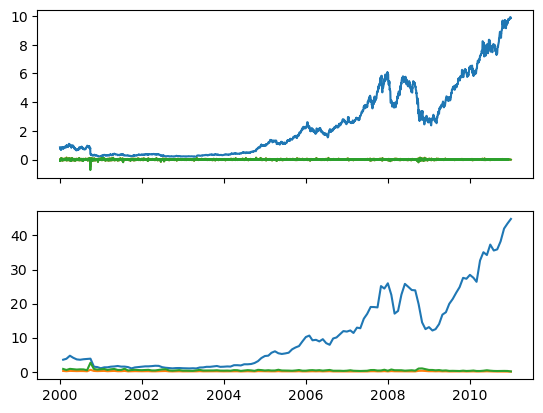

In [36]:
# 1 import the libs
import pandas as pd

# 2 Define the function for calculating the realized volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

# 3 Calculate the monthly realized volatility
df_rv = df2.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
print(df_rv.head())
# 4 Analyze the values
df_rv.rv = df_rv.rv * np.sqrt(12)
# 5 Plot the results
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df2)
ax[1].plot(df_rv)